In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('stock.csv')
print(df)

              date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]


In [53]:
df['date'] = pd.to_datetime(df['date'])


In [71]:
print(df.head())

        date   open   high    low  close   volume Name
0 2013-02-08  45.07  45.35  45.00  45.08  1824755    A
1 2013-02-11  45.17  45.18  44.45  44.60  2915405    A
2 2013-02-12  44.81  44.95  44.50  44.62  2373731    A
3 2013-02-13  44.81  45.24  44.68  44.75  2052338    A
4 2013-02-14  44.72  44.78  44.36  44.58  3826245    A


In [73]:
print(df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [74]:
print(df.shape)

(619040, 7)


In [54]:
df = df.sort_values(['Name','date']).reset_index(drop=True)


In [56]:
df[['open','high','low']] = df.groupby('Name')[['open','high','low']].transform(lambda g: g.ffill().bfill())

In [57]:
print("Missing values after fill:\n", df.isnull().sum())

Missing values after fill:
 date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [58]:
top_name = df['Name'].value_counts().idxmax()   # most frequent ticker
print("Modelling for:", top_name)

df_company = df[df['Name'] == top_name].copy().reset_index(drop=True)
print("Company rows:", df_company.shape[0])
df_company.head()

Modelling for: ZTS
Company rows: 1259


,date,open,high,low,close,volume,Name
0,2013-02-08,32.31,33.48,32.30,33.05,2599232,ZTS
1,2013-02-11,33.06,33.50,32.88,33.26,1486115,ZTS
2,2013-02-12,33.40,34.00,33.15,33.74,1637279,ZTS
3,2013-02-13,33.80,33.80,33.00,33.55,1269625,ZTS
4,2013-02-14,33.39,33.45,32.77,33.27,2954324,ZTS


In [60]:
print(df_company.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB
None


In [61]:
print(df_company.describe())

                                date         open         high          low  \
count                           1259  1259.000000  1259.000000  1259.000000   
mean   2015-08-09 05:44:16.393963264    45.091389    45.488826    44.665588   
min              2013-02-08 00:00:00    28.480000    28.570000    28.135000   
25%              2014-05-10 12:00:00    32.800000    33.055000    32.500000   
50%              2015-08-10 00:00:00    45.610000    46.040000    45.055000   
75%              2016-11-05 12:00:00    51.485000    51.920000    50.957500   
max              2018-02-07 00:00:00    79.810000    80.130000    79.380000   
std                              NaN    11.963030    12.028866    11.931225   

             close        volume  
count  1259.000000  1.259000e+03  
mean     45.098648  3.681878e+06  
min      28.400000  4.386320e+05  
25%      32.830000  2.251372e+06  
50%      45.620000  3.014964e+06  
75%      51.295000  4.233920e+06  
max      80.090000  3.962756e+07  
std     

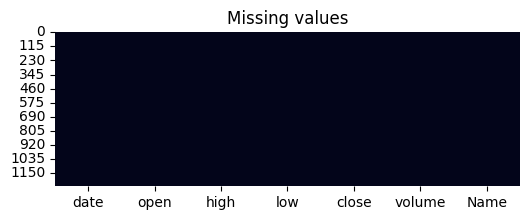

In [62]:
#Missing values heatmap
plt.figure(figsize=(6,2))
sns.heatmap(df_company.isnull(), cbar=False)
plt.title("Missing values")
plt.show()

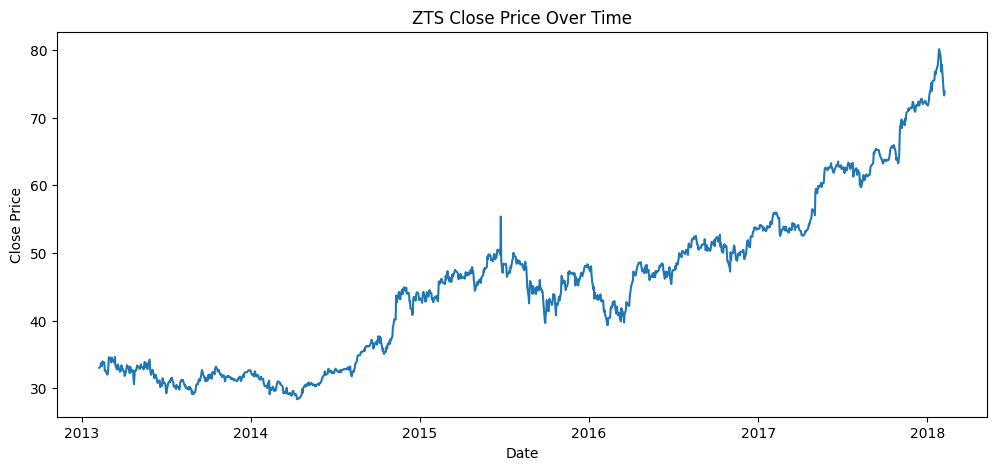

In [63]:
# Time-series plot of close price
plt.figure(figsize=(12,5))
plt.plot(df_company['date'], df_company['close'])
plt.title(f"{top_name} Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

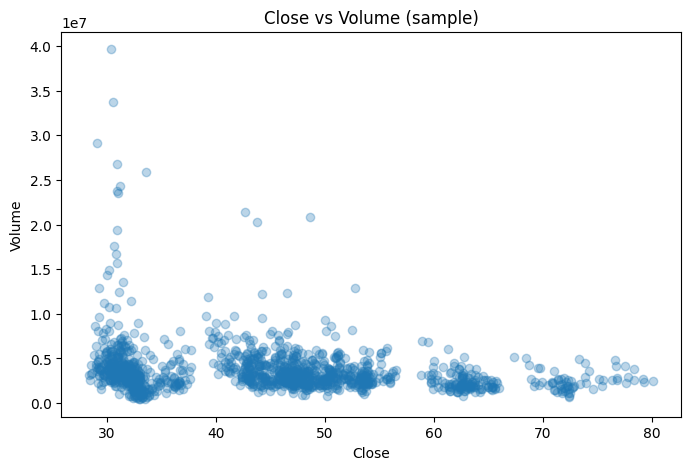

In [65]:
# Volume vs Close scatter
RANDOM_STATE = 42 # Define RANDOM_STATE
sample = df_company.sample(min(2000, len(df_company)), random_state=RANDOM_STATE)
plt.figure(figsize=(8,5))
plt.scatter(sample['close'], sample['volume'], alpha=0.3)
plt.xlabel("Close")
plt.ylabel("Volume")
plt.title("Close vs Volume (sample)")
plt.show()

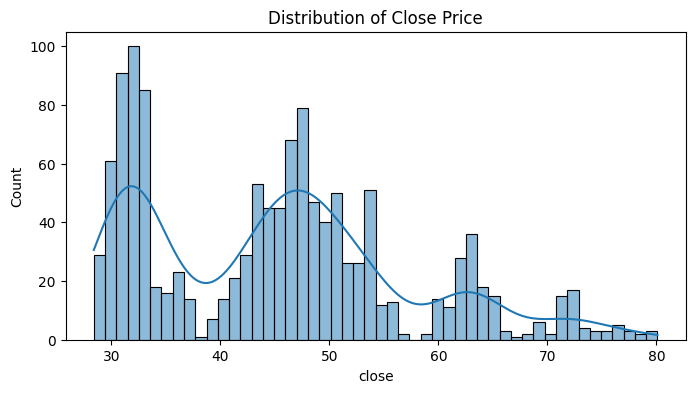

In [66]:
# Distribution of returns (will compute returns next, but show close dist)
plt.figure(figsize=(8,4))
sns.histplot(df_company['close'], bins=50, kde=True)
plt.title("Distribution of Close Price")
plt.show()